In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('radar.csv')

In [3]:
df['logroughness'] = df.roughness.apply(np.log)

In [4]:
X = df[['thickness','LAB_B_dmin','g60','logroughness']]

In [5]:
X = X.dropna()

# LR

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [7]:
for ycol in X.columns:
    y = X[ycol]
    xcols = X[[item for item in X.columns if item!=ycol]]
    unfitted_model = LinearRegression(fit_intercept=True)
    cv = cross_validate(unfitted_model, xcols, y, cv=10, scoring='r2')
    print(ycol,cv['test_score'].mean())

thickness 0.09257277319652489
LAB_B_dmin 0.26462136552951054
g60 0.5253532234532357
logroughness 0.5484630293594072


In [8]:
modeld = {}
for ycol in X.columns:
    y = X[ycol]
    xcols = X[[item for item in X.columns if item!=ycol]]
    unfitted_model = LinearRegression(fit_intercept=True)
    fitted_model = unfitted_model.fit(xcols, y)
    modeld[ycol] = fitted_model

In [9]:
for ycol in X.columns:
    xcols = [item for item in X.columns if item!=ycol]
    df[ycol][df[ycol].isnull()] = modeld[ycol].predict(df[xcols][df[ycol].isnull()])

<AxesSubplot:>

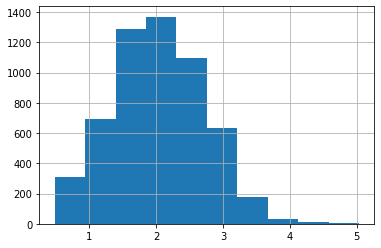

In [10]:
df.logroughness.hist()

<AxesSubplot:>

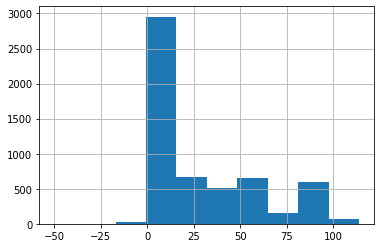

In [11]:
df.g60.hist()

In [12]:
df[df.g60 < 0]

,catalog,roughness,thickness,g60,LAB_L_dmin,LAB_A_dmin,LAB_B_dmin,LAB_L_dmax,LAB_A_dmax,LAB_B_dmax,logroughness
14,1006h,20.025758,0.270,-3.203506,90.30,-0.23,20.09,43.47,-1.87,-5.17,2.997019
15,1006i,20.892911,0.290,-3.646127,90.65,-0.74,15.85,43.31,-2.12,-2.92,3.039410
16,1006j,22.594678,0.350,-12.512841,87.81,0.41,23.84,54.59,-3.21,1.08,3.117714
17,1006k,23.191945,0.390,-12.275988,90.71,-0.74,16.49,49.97,-3.11,0.89,3.143805
20,1006n,26.273540,0.150,-0.827878,90.86,-0.97,12.60,52.54,-2.96,-1.01,3.268562
22,1006p,32.940005,0.270,-16.105139,89.09,-1.22,18.41,42.85,-1.03,-8.10,3.494688
88,1023f,17.900958,0.373,-3.327773,83.34,-0.90,14.33,32.31,1.73,7.32,2.884854
89,1023g,20.239079,0.382,-7.041262,83.90,-1.27,14.00,36.98,0.24,-0.02,3.007615
92,1023j,20.291547,0.353,-6.970631,86.06,-0.47,17.39,29.48,0.75,3.57,3.010204
94,1023m,18.210372,0.357,-5.141584,86.33,-0.02,19.52,37.02,0.04,-2.99,2.901991


<AxesSubplot:>

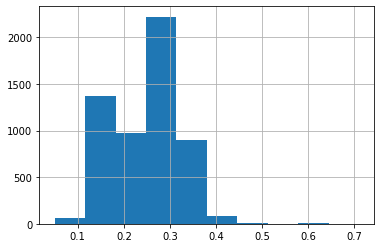

In [13]:
df.thickness.hist()

<AxesSubplot:>

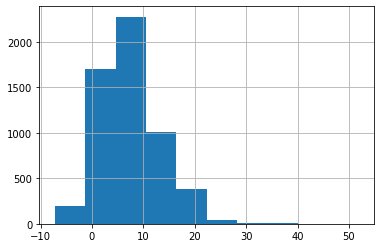

In [14]:
df.LAB_B_dmin.hist()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   catalog       5624 non-null   object 
 1   roughness     5275 non-null   float64
 2   thickness     5624 non-null   float64
 3   g60           5624 non-null   float64
 4   LAB_L_dmin    5487 non-null   float64
 5   LAB_A_dmin    5487 non-null   float64
 6   LAB_B_dmin    5624 non-null   float64
 7   LAB_L_dmax    3265 non-null   float64
 8   LAB_A_dmax    3265 non-null   float64
 9   LAB_B_dmax    3265 non-null   float64
 10  logroughness  5624 non-null   float64
dtypes: float64(10), object(1)
memory usage: 483.4+ KB


In [16]:
df = df[['catalog','thickness','g60','LAB_L_dmin','LAB_L_dmax',
         'LAB_A_dmin','LAB_A_dmax','LAB_B_dmin','LAB_B_dmax','logroughness']]

In [17]:
df.to_csv("radar_impute.csv",index=False)